# __Exploratory Data Analysis__ - `business` Dataset
## Importing necessary packages and modules

In [1368]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import learning_curve, cross_validate, cross_val_score

pd.set_option('display.max_columns', None)

## Business dataset

In [1369]:
# Load data
business_path = '/Users/quentindubois/code/Dimasaur/scorecast/raw_data/yelp_dataset_yelp_academic_dataset_business.json'
business = pd.read_json(business_path,
                    lines=True)

In [1370]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Describe data

In [1371]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


### __Observations__
- The `attributes` feature has 9,2% missing values
- The hours feature has 15,4% missing values
- Everything else is __fine__.

In [1372]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [1373]:
business.stars.value_counts()

4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: stars, dtype: int64

### __Observations__
Few numerical columns:
- Latitude and longitude aren't that useful
- The `stars` feature is numerical but it is actually a discrete variable, with values ranging from 1.0 to 5.0, with a step size of 0.5 (i.e. 1.0, 1.5, 2.0, 2.5, and so on). __It will need to be encoded with an ordinal encoder.__
- `review_count` looks like it might have a right skew: average number of reviews is 45 with a standard deviation of 121, 75th percentle is 37.
- `is_open` is a boolean field coming through as an integer.

# Data Visualisation

#### `categories`

In [1374]:
# Check most and least common categories
business.categories.value_counts(normalize=True)

Beauty & Spas, Nail Salons                                                                                       0.006736
Restaurants, Pizza                                                                                               0.006223
Nail Salons, Beauty & Spas                                                                                       0.006217
Pizza, Restaurants                                                                                               0.005478
Restaurants, Mexican                                                                                             0.004845
                                                                                                                   ...   
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas           0.000007
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances    0.000007
Food Trucks, Smokehouse,

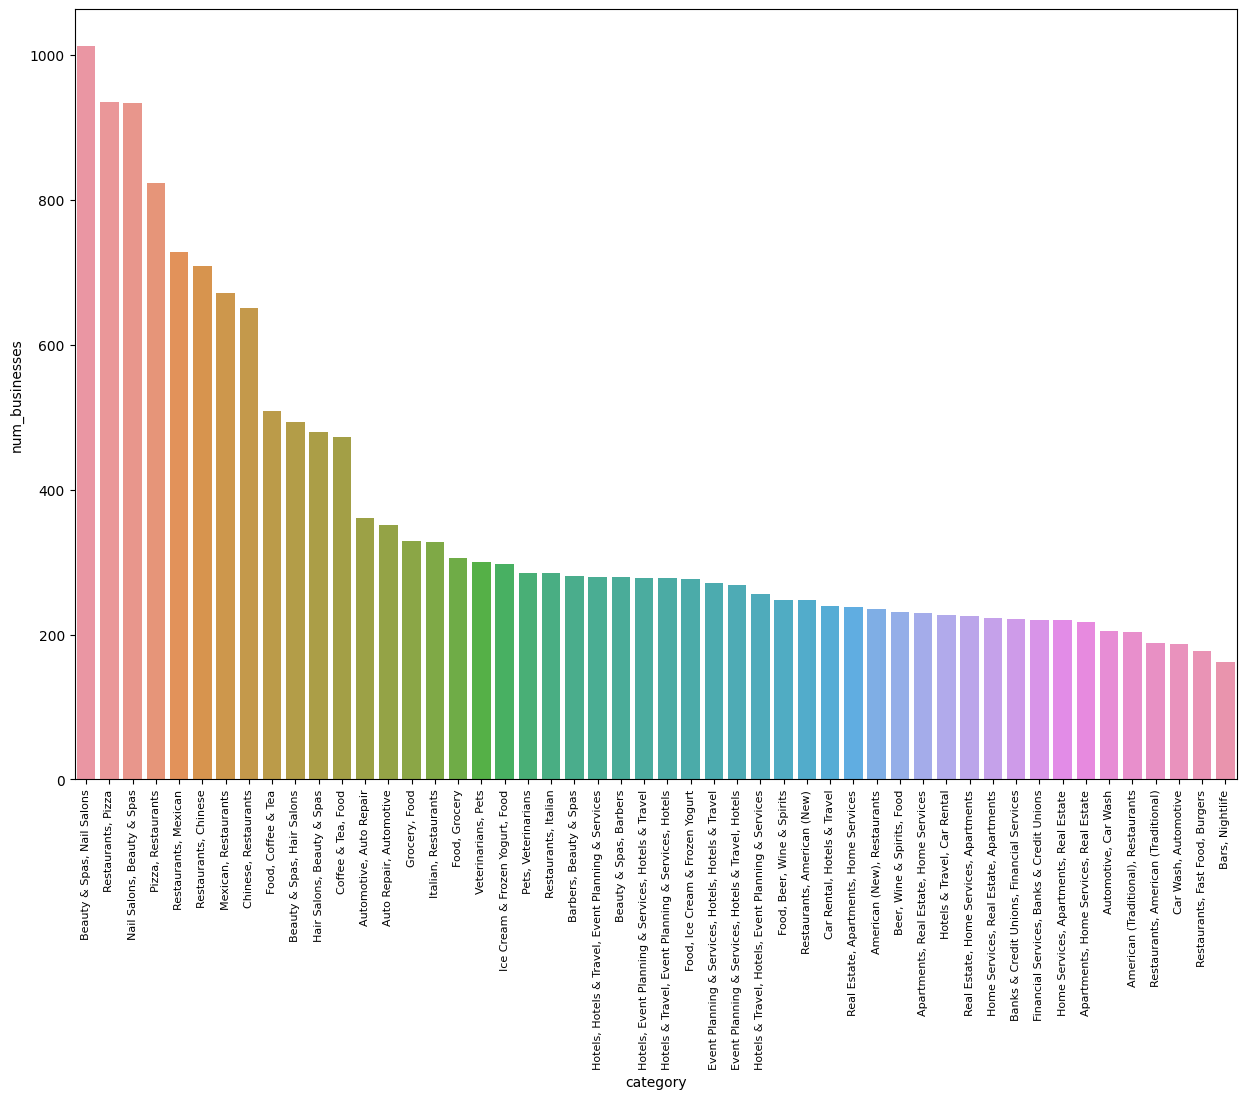

In [1375]:
# Plotting the 50 most common categories in terms of number of businesses
plt.figure(figsize=(15,10))

cat_counts = business['categories'].value_counts().reset_index()[:50]
cat_counts.columns = ['category', 'num_businesses']

sns.barplot(data = cat_counts,
            x='category',
            y='num_businesses')

# Rotate x-tick labels due to many categories
plt.xticks(rotation=90, fontsize=8);

In [1376]:
business.categories.nunique()

83160

In [1377]:
business.categories.isnull().sum()

103

### Filtering data to retain only restaurants

In [1378]:
business['contains_restaurants'] = business['categories'].str.contains('Restaurants')

In [1379]:
business.contains_restaurants.value_counts(normalize=True)

False    0.65211
True     0.34789
Name: contains_restaurants, dtype: float64

In [1380]:
# Create restaurants subset
restaurants = business[business['contains_restaurants'] == True].reset_index()
# Drop contains_restaurants
restaurants = restaurants.drop(columns='contains_restaurants')

In [1381]:
restaurants.categories.nunique()

31680

In [1382]:
restaurants.categories.value_counts(normalize=True)

Restaurants, Pizza                                                                                                                                                         0.017889
Pizza, Restaurants                                                                                                                                                         0.015746
Restaurants, Mexican                                                                                                                                                       0.013928
Restaurants, Chinese                                                                                                                                                       0.013546
Mexican, Restaurants                                                                                                                                                       0.012857
                                                                                                    

In [1383]:
# Extract food type from the categories column

# 1. Split the categories to make a list out of the different elements
restaurants['food_type_raw'] = restaurants['categories'].str.split(', ')

# 2.1 Remove the "Restaurants" element from the list
restaurants['food_type_temp'] = restaurants['food_type_raw'].apply(lambda x: [item for item in x if item != "Restaurants"])
# 2.2 Remove the "Breakfast & Brunch" element from the list
restaurants['food_type_temp'] = restaurants['food_type_temp'].apply(lambda x: [item for item in x if item != "Breakfast & Brunch"])

# 3. Compute length of list with remaining elements
restaurants['food_type_length'] = restaurants['food_type_temp'].apply(len)

# 4. Set `food_type` to Other when there are 3 or more elements as categories, else jsut set the 1 or 2 elements
restaurants['food_type'] = 'O'

# Max. 1 element allowed
# restaurants.loc[restaurants['food_type_length'] == 1 ,'food_type'] = restaurants.loc[restaurants['food_type_length'] == 1, \
#     'food_type_temp'].apply(lambda x: x[0])

# Max. 2 elements allowed
restaurants.loc[restaurants['food_type_length'] <= 2 ,'food_type'] = restaurants.loc[restaurants['food_type_length'] <= 2, \
     'food_type_temp']

# 5. Order list elements alphabetically so as to get rid of "inverted duplicates" e.g. [Pizza, Italian] and [Italian, Pizza]
restaurants['food_type'] = restaurants['food_type'].apply(lambda x: sorted(x))

# Remove `food_type_length` column
restaurants.drop(columns=['food_type_raw', 'food_type_temp', 'food_type_length'], inplace=True)

In [1384]:
restaurants.categories.str.contains('Breakfast & Brunch').sum()/len(restaurants)

0.11936557740873957

In [1385]:
restaurants.food_type.value_counts(normalize=True).round(3).head(21)

[O]                         0.625
[Pizza]                     0.034
[Mexican]                   0.027
[Chinese]                   0.026
[Burgers, Fast Food]        0.016
[Italian, Pizza]            0.013
[Italian]                   0.012
[American (New)]            0.010
[American (Traditional)]    0.010
[Fast Food, Sandwiches]     0.010
[Japanese, Sushi Bars]      0.006
[]                          0.006
[Thai]                      0.006
[Sandwiches]                0.005
[Barbeque]                  0.005
[Vietnamese]                0.005
[Seafood]                   0.005
[Diners]                    0.005
[Coffee & Tea, Food]        0.004
[Indian]                    0.004
[Fast Food, Mexican]        0.004
Name: food_type, dtype: float64

In [1386]:
# # Plotting the 50 most common food types (without 'Other')
# plt.figure(figsize=(15,10))

# cat_counts = restaurants['food_type'].value_counts().reset_index()[:50]
# cat_counts.columns = ['food_type', 'num_businesses']

# sns.barplot(data = cat_counts,
#             x='food_type',
#             y='num_businesses')

# # Rotate x-tick labels due to many categories
# plt.xticks(rotation=90, fontsize=8);

In [1387]:
restaurants.columns

Index(['index', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'food_type'],
      dtype='object')

In [1388]:
mean_stars_per_city = pd.DataFrame(restaurants.groupby('city')['stars'].mean()).reset_index().sort_values('stars')
num_reviews_per_city = pd.DataFrame(restaurants.groupby('city')['review_count'].sum()).reset_index().sort_values('review_count')

mean_stars_and_review_count_per_city = mean_stars_per_city.merge(num_reviews_per_city, how='left', on='city')

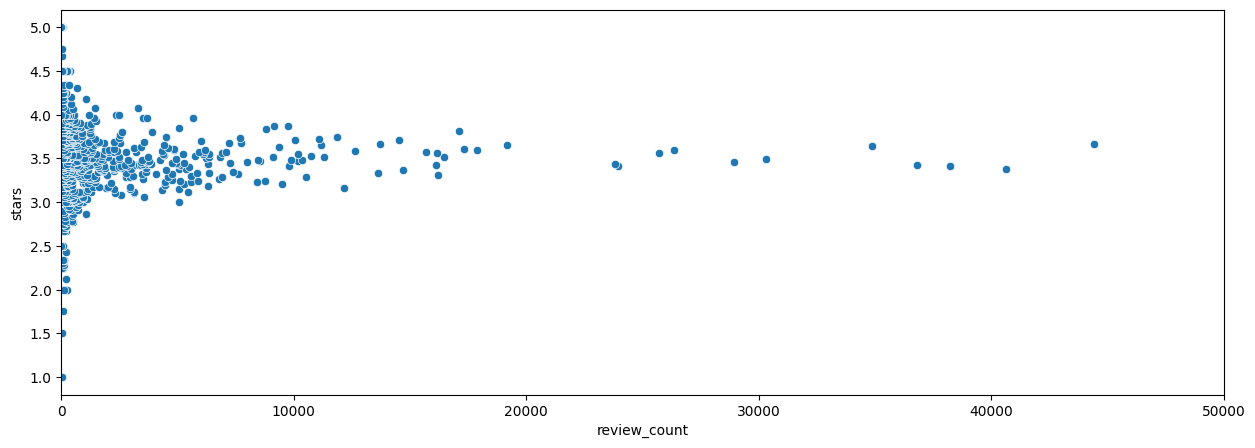

In [1389]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=mean_stars_and_review_count_per_city,
                x='review_count',
                y='stars')
plt.xlim(0,50000);

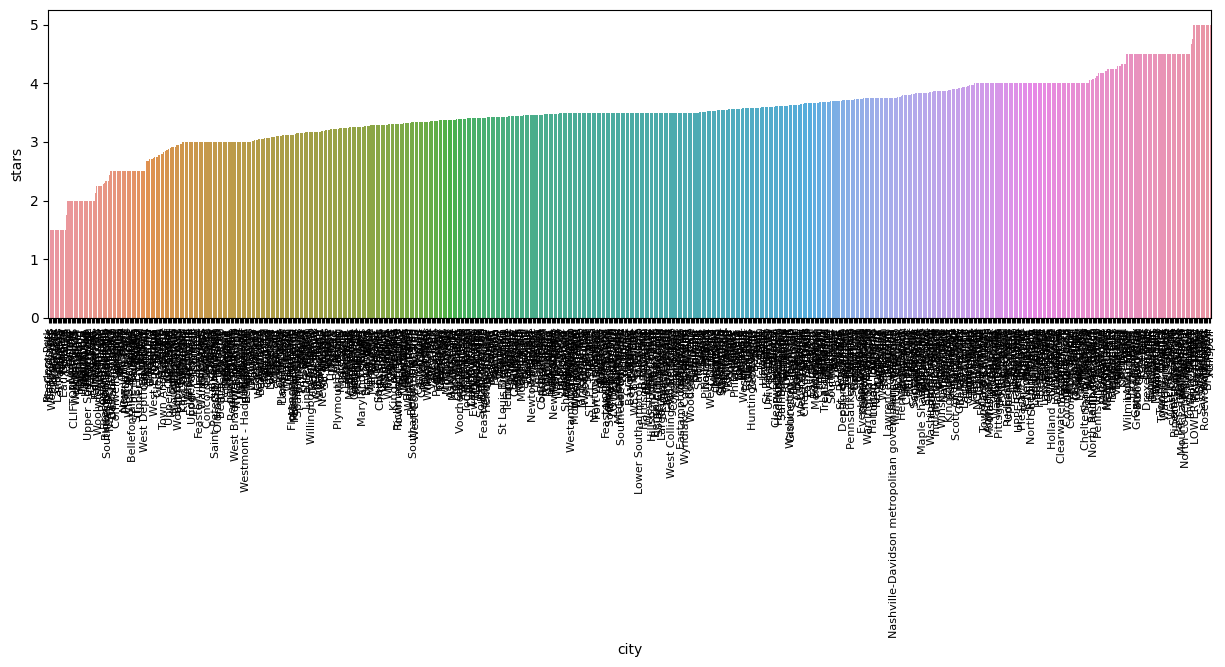

In [1390]:
plt.figure(figsize=(15,4))
sns.barplot(data = mean_stars_per_city,
             x='city',
             y='stars')

 # Rotate x-tick labels due to many categories
plt.xticks(rotation=90, fontsize=8);

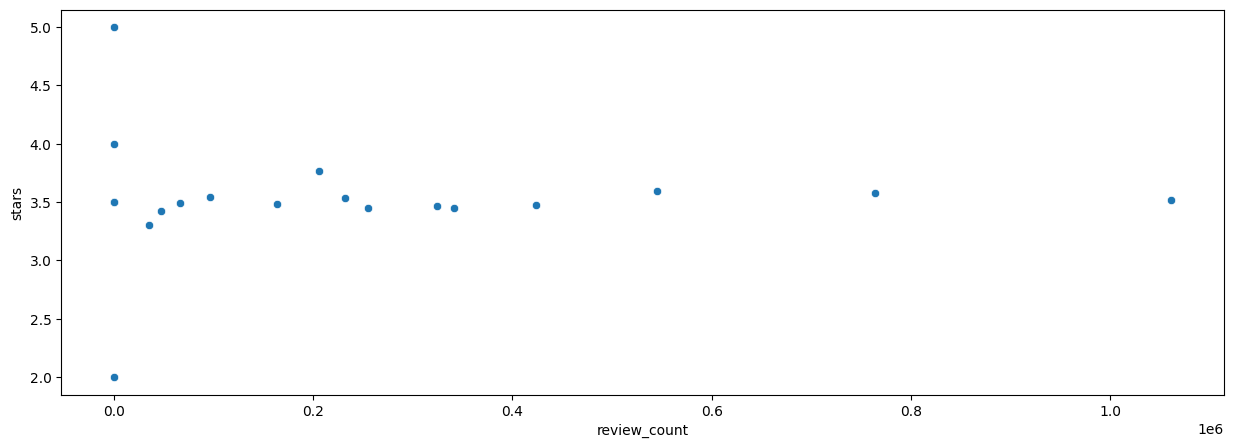

In [1391]:
mean_stars_per_state = pd.DataFrame(restaurants.groupby('state')['stars'].mean()).reset_index().sort_values('stars')
num_reviews_per_state = pd.DataFrame(restaurants.groupby('state')['review_count'].sum()).reset_index().sort_values('review_count')

mean_stars_and_review_count_per_state = mean_stars_per_state.merge(num_reviews_per_state, how='left', on='state')

plt.figure(figsize=(15,5))
sns.scatterplot(data=mean_stars_and_review_count_per_state,
                x='review_count',
                y='stars');

#### __Observations__
- VERY large number of categories: 83k
  - This will have to be reduced by grouping categories
- There are numerous categories that are irrelevant for the project e.g. Beauty & Spas, Nail Salons.
  - This will also have to be cleaned up.


__Further digging__
- About 1/3rd of the data (52k businesses) have the word "Restaurants" as one of their categories
  - ➡️ Suggestion to filter dataset for only businesses that have the word "Restaurants" as one of their categories.

---

### `attributes`

In [1392]:
# Create subset of restaurants
restaurants_subset = restaurants.sample(5000, random_state=1).reset_index()

# Initialise empty list
attributes_list = []

# Iterate over the 'attributes' column
for row in restaurants_subset['attributes']:
    if isinstance(row, dict):  # Check if the row is a dictionary
        # Convert dict_keys to a list and add it to the attributes_list
        attributes_list.extend(list(row.keys()))

# Remove duplicates if needed
attributes_list = sorted(list(set(attributes_list)))

attributes_list

['AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HairSpecializesIn',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi']

In [1393]:
# Extracting values from the `attributes` feature
restaurants['delivery'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsDelivery', False) if x else False)
restaurants['alcohol'] = restaurants['attributes'].apply(lambda x: x.get('Alcohol', False) if x else False)
restaurants['ambience'] = restaurants['attributes'].apply(lambda x: x.get('Ambience', False) if x else False)
restaurants['bike_parking'] = restaurants['attributes'].apply(lambda x: x.get('BikeParking', False) if x else False)
restaurants['credit_card'] = restaurants['attributes'].apply(lambda x: x.get('BusinessAcceptsCreditCards', False) if x else False)
restaurants['parking'] = restaurants['attributes'].apply(lambda x: x.get('BusinessParking', False) if x else False)
restaurants['appointment_only'] = restaurants['attributes'].apply(lambda x: x.get('ByAppointmentOnly', False) if x else False)
restaurants['caters'] = restaurants['attributes'].apply(lambda x: x.get('Caters', False) if x else False)
restaurants['coat_check'] = restaurants['attributes'].apply(lambda x: x.get('CoatCheck', False) if x else False)
restaurants['dogs'] = restaurants['attributes'].apply(lambda x: x.get('DogsAllowed', False) if x else False)
restaurants['drive_thru'] = restaurants['attributes'].apply(lambda x: x.get('DriveThru', False) if x else False)
restaurants['good_for_kids'] = restaurants['attributes'].apply(lambda x: x.get('GoodForKids', False) if x else False)
restaurants['good_for_groups'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsGoodForGroups', False) if x else False)
restaurants['happy_hour'] = restaurants['attributes'].apply(lambda x: x.get('HappyHour', False) if x else False)
restaurants['tv'] = restaurants['attributes'].apply(lambda x: x.get('HasTV', False) if x else False)
restaurants['outdoor_seating'] = restaurants['attributes'].apply(lambda x: x.get('OutdoorSeating', False) if x else False)
restaurants['attire'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsAttire', False) if x else False)
restaurants['price_range'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsPriceRange2', False) if x else False)
restaurants['reservations'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsReservations', False) if x else False)
restaurants['table_service'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsTableService', False) if x else False)
restaurants['take_out'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsTakeOut', False) if x else False)
restaurants['wheelchair'] = restaurants['attributes'].apply(lambda x: x.get('WheelchairAccessible', False) if x else False)
restaurants['wifi'] = restaurants['attributes'].apply(lambda x: x.get('WiFi', False) if x else False)

# Inspect df
restaurants.head(3)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,food_type,delivery,alcohol,ambience,bike_parking,credit_card,parking,appointment_only,caters,coat_check,dogs,drive_thru,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,attire,price_range,reservations,table_service,take_out,wheelchair,wifi
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",[O],False,u'none',False,True,False,"{'garage': False, 'street': True, 'validated':...",False,True,False,False,False,False,False,False,False,False,False,1,False,False,True,False,u'free'
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",[O],True,u'none',None,False,True,None,False,False,False,False,True,True,True,False,True,True,u'casual',1,False,False,True,True,u'no'
2,8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,[O],False,u'full_bar',"{'romantic': False, 'intimate': False, 'touris...",False,True,"{'garage': False, 'street': False, 'validated'...",False,True,False,False,False,True,True,False,True,True,u'casual',1,False,False,True,False,u'free'


#### `alcohol`

In [1394]:
# Processing of `alcohol` feature
restaurants['alcohol'] = np.where(restaurants['alcohol'].isin(["u'full_bar'", "u'beer_and_wine'", "'full_bar'", "'beer_and_wine'"]), True, False)

In [1395]:
restaurants.alcohol.value_counts(normalize=True).round(3)

False    0.624
True     0.376
Name: alcohol, dtype: float64

### `ambience` (won't do because not value-adding and a bit complex)

In [1396]:
restaurants.loc[2,'ambience']

"{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"

In [1397]:
# Function to remove 'u' from keys in a dictionary
# def remove_u_from_keys(d):
#     if isinstance(d, dict):
#         return {key.lstrip('u'): value for key, value in d.items()}
#     return d

def remove_u_from_keys(d):
    if isinstance(d, dict):
        return {str(key).lstrip('u').strip("'"): value for key, value in d.items()}
    return d

# Apply the function to the 'ambience' column
restaurants['ambience'] = restaurants['ambience'].apply(remove_u_from_keys)

In [1398]:
restaurants.ambience.value_counts(normalize=True)

False                                                                                                                                                                     0.204733
{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}          0.120973
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}          0.091681
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}           0.079035
{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}           0.078939
                                                                                                         

### `hours_per_week`

In [1399]:
def get_hours_per_week(hours_dict):
    # Initialising output variable with a value of 0
    hours_per_week = 0

    if hours_dict is None:
        return np.nan

    for hours in hours_dict.values():
        # Split hours into opening and closing time
        hours_split = hours.split("-")

        # Storing opening and closing hours as individual lists, where the first
        # element represents the hour and the second represents the minute.
        opening_hours = hours_split[0].split(":")
        closing_hours = hours_split[1].split(":")

        # Extracting opening hour and minute as a numerical value
        opening_hour = int(opening_hours[0])
        opening_minute = int(opening_hours[1])/60

        # Extracting closing hour and minute as a numerical value
        closing_hour = int(closing_hours[0])
        closing_minute = int(closing_hours[1])/60

        # Setting hours that are equal to 0 (i.e. midnight) to 24, to be able to
        # calculate differences.
        if opening_hour == 0 and closing_hour == 0:
            hours_open = 0
        elif opening_hour != 0 and closing_hour < opening_hour:
            closing_hour = closing_hour + 24

            # Creating a float representing opening time and closing time
            opening_time = opening_hour + opening_minute
            closing_time = closing_hour + closing_minute

            # Calculating the number of hours that the restaurant is open on that day.
            hours_open = closing_time - opening_time

            # Updating output variable
            hours_per_week = hours_per_week + hours_open
        else:
            # Creating a float representing opening time and closing time
            opening_time = opening_hour + opening_minute
            closing_time = closing_hour + closing_minute

            # Calculating the number of hours that the restaurant is open on that day.
            hours_open = closing_time - opening_time

            # Updating output variable
            hours_per_week = hours_per_week + hours_open


        # Print elements about current run of loop
        # print(f'Opening hour: {opening_hour} - Opening minute: {opening_minute}\
        #       \nClosing hour: {closing_hour} - Closing minute: {closing_minute}\
        #       \nHours per week: {hours_per_week}\n')


    return hours_per_week

In [1400]:
restaurants['hours_per_week'] = restaurants['hours'].apply(get_hours_per_week)
restaurants.head(3)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,food_type,delivery,alcohol,ambience,bike_parking,credit_card,parking,appointment_only,caters,coat_check,dogs,drive_thru,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,attire,price_range,reservations,table_service,take_out,wheelchair,wifi,hours_per_week
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",[O],False,False,False,True,False,"{'garage': False, 'street': True, 'validated':...",False,True,False,False,False,False,False,False,False,False,False,1,False,False,True,False,u'free',94.0
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",[O],True,False,None,False,True,None,False,False,False,False,True,True,True,False,True,True,u'casual',1,False,False,True,True,u'no',90.0
2,8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,[O],False,True,"{'romantic': False, 'intimate': False, 'touris...",False,True,"{'garage': False, 'street': False, 'validated'...",False,True,False,False,False,True,True,False,True,True,u'casual',1,False,False,True,False,u'free',NaN


### `open_on_weekend`

In [1401]:
def get_open_on_weekend(hours_dict):
    if hours_dict is None:
        return np.nan

    # Safely get opening hours for Saturday and Sunday
    saturday_hours = hours_dict.get('Saturday', None)
    sunday_hours = hours_dict.get('Sunday', None)

    # If no opening hours are found for either day, return False
    if saturday_hours is None and sunday_hours is None:
        return np.nan

    # Initialize opening hours and minutes to 0 for default
    sat_hour, sat_minute = 0, 0
    sun_hour, sun_minute = 0, 0

    # Parse Saturday's opening time if available
    if saturday_hours:
        sat_hour = int(saturday_hours.split("-")[0].split(":")[0])
        sat_minute = int(saturday_hours.split("-")[0].split(":")[1])

    # Parse Sunday's opening time if available
    if sunday_hours:
        sun_hour = int(sunday_hours.split("-")[0].split(":")[0])
        sun_minute = int(sunday_hours.split("-")[0].split(":")[1])

    # Check if the restaurant opens at any non-zero time on the weekend
    return sat_hour != 0 or sat_minute != 0 or sun_hour != 0 or sun_minute != 0


In [1402]:
restaurants['open_on_weekend'] = restaurants['hours'].apply(get_open_on_weekend)

In [1403]:
restaurants.open_on_weekend.value_counts(normalize=True)

True     0.968012
False    0.031988
Name: open_on_weekend, dtype: float64

### `wifi`

In [1404]:
# Processing of wifi feature
restaurants['wifi'] = np.where(restaurants['wifi'].isin(["u'free'", "'free'"]), True, False)

restaurants.wifi.value_counts()

False    31847
True     20421
Name: wifi, dtype: int64

### `attire`

In [1405]:
restaurants['attire'][(restaurants['attire']== "'casual'") |
                       (restaurants['attire']== "u'casual'")] = 'casual'

restaurants['attire'][(restaurants['attire']== "u'dressy'") |
                       (restaurants['attire']== "'dressy'")] = 'dressy'

restaurants['attire'][(restaurants['attire']== "'formal'") |
                       (restaurants['attire']== "u'formal'")] = 'formal'

restaurants['attire'][(restaurants['attire']== "None") |
                       (restaurants['attire']== False)] = 'missing'

display(restaurants.attire.value_counts())


/var/folders/l1/rkgp17vj6tqfsh9m1nsss6kh0000gn/T/ipykernel_34785/1081505783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['attire'][(restaurants['attire']== "'casual'") |
/var/folders/l1/rkgp17vj6tqfsh9m1nsss6kh0000gn/T/ipykernel_34785/1081505783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['attire'][(restaurants['attire']== "u'dressy'") |
/var/folders/l1/rkgp17vj6tqfsh9m1nsss6kh0000gn/T/ipykernel_34785/1081505783.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

casual     38089
missing    13313
dressy       796
formal        70
Name: attire, dtype: int64

In [1406]:
restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,food_type,delivery,alcohol,ambience,bike_parking,credit_card,parking,appointment_only,caters,coat_check,dogs,drive_thru,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,attire,price_range,reservations,table_service,take_out,wheelchair,wifi,hours_per_week,open_on_weekend
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",[O],False,False,False,True,False,"{'garage': False, 'street': True, 'validated':...",False,True,False,False,False,False,False,False,False,False,missing,1,False,False,True,False,True,94.0,True
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",[O],True,False,None,False,True,None,False,False,False,False,True,True,True,False,True,True,casual,1,False,False,True,True,False,90.0,True
2,8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,[O],False,True,"{'romantic': False, 'intimate': False, 'touris...",False,True,"{'garage': False, 'street': False, 'validated'...",False,True,False,False,False,True,True,False,True,True,casual,1,False,False,True,False,True,NaN,NaN
3,9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",[O],True,False,False,False,True,"{'garage': False, 'street': False, 'validated'...",False,False,False,False,True,True,False,False,True,True,casual,1,False,False,True,True,False,76.0,True
4,11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",[O],False,False,"{'touristy': False, 'hipster': False, 'romanti...",False,False,"{'garage': False, 'street': False, 'validated'...",False,False,False,False,False,False,False,False,False,None,missing,False,False,False,False,False,False,23.0,True


### `delivery`

In [1407]:
restaurants['delivery'] = np.where(restaurants['delivery'] == 'True', True, False)


### `credit_card`

In [1408]:
restaurants['credit_card'] = np.where(restaurants['credit_card'] == 'True', True, False)

### `appointment_only`

In [1409]:
restaurants['appointment_only'] = np.where(restaurants['appointment_only'] == 'True', True, False)

### `caters`

In [1410]:
restaurants['caters'] = np.where(restaurants['caters'] == 'True', True, False)

### `coat_check`

In [1411]:
restaurants['coat_check'] = np.where(restaurants['coat_check'] == 'True', True, False)

### `dogs`

In [1412]:
restaurants['dogs'] = np.where(restaurants['dogs'] == 'True', True, False)

### `drive_thru`

In [1413]:
restaurants['drive_thru'] = np.where(restaurants['drive_thru'] == 'True', True, False)

### `good_for_kids`

In [1414]:
restaurants['good_for_kids'] = np.where(restaurants['good_for_kids'] == 'True', True, False)

### `good_for_groups`

In [1415]:
restaurants['good_for_groups'] = np.where(restaurants['good_for_groups'] == 'True', True, False)

### `happy_hour`

In [1416]:
restaurants['happy_hour'] = np.where(restaurants['happy_hour'] == 'True', True, False)

### `tv`

In [1417]:
restaurants['tv'] = np.where(restaurants['tv'] == 'True', True, False)

### `outdoor_seating`

In [1418]:
restaurants['outdoor_seating'] = np.where(restaurants['outdoor_seating'] == 'True', True, False)

### `reservations`

In [1419]:
restaurants['reservations'] = np.where(restaurants['reservations'] == 'True', True, False)

### `table_service`

In [1420]:
restaurants['table_service'] = np.where(restaurants['table_service'] == 'True', True, False)

### `take_out`

In [1421]:
restaurants['take_out'] = np.where(restaurants['take_out'] == 'True', True, False)

### `wheelchair`

In [1422]:
restaurants['wheelchair'] = np.where(restaurants['wheelchair'] == 'True', True, False)

---
---
## Writing a CSV file with limited features to start working on model

In [1427]:
# Writing a CSV with limited features so rest of the team can start building and training a model
restaurants_preprocessed = restaurants.drop(columns=['name',
                                                         'address',
                                                         'city',
                                                         'state',
                                                         'ambience',
                                                         'attributes',
                                                         'categories',
                                                         'hours',
                                                         'parking'])

restaurants_preprocessed.to_csv('/Users/quentindubois/code/Dimasaur/scorecast/eda/restaurants_preprocessed.csv')

In [1425]:
restaurants_preprocessed.head()

,index,business_id,postal_code,latitude,longitude,stars,review_count,is_open,food_type,delivery,alcohol,bike_parking,credit_card,appointment_only,caters,coat_check,dogs,drive_thru,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,attire,price_range,reservations,table_service,take_out,wheelchair,wifi,hours_per_week,open_on_weekend
0,3,MTSW4McQd7CbVtyjqoe9mw,19107,39.955505,-75.155564,4.0,80,1,[O],False,False,True,False,False,True,False,False,False,False,False,False,False,False,missing,1,False,False,True,False,True,94.0,True
1,5,CF33F8-E6oudUQ46HnavjQ,37015,36.269593,-87.058943,2.0,6,1,[O],True,False,False,True,False,False,False,False,True,True,True,False,True,True,casual,1,False,False,True,True,False,90.0,True
2,8,k0hlBqXX-Bt0vf1op7Jr1w,63123,38.565165,-90.321087,3.0,19,0,[O],False,True,False,True,False,True,False,False,False,True,True,False,True,True,casual,1,False,False,True,False,True,NaN,NaN
3,9,bBDDEgkFA1Otx9Lfe7BZUQ,37207,36.208102,-86.768170,1.5,10,1,[O],True,False,False,True,False,False,False,False,True,True,False,False,True,True,casual,1,False,False,True,True,False,76.0,True
4,11,eEOYSgkmpB90uNA7lDOMRA,33602,27.955269,-82.456320,4.0,10,1,[O],False,False,False,False,False,False,False,False,False,False,False,False,False,False,missing,False,False,False,False,False,False,23.0,True


---
---
## __Numerical features__
### `stars`

Text(0.5, 1.0, 'Stars\nMean:3.6\nStd. Dev:0.97')

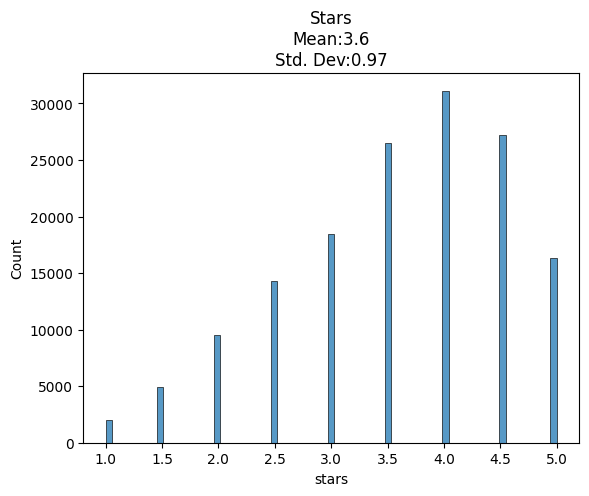

In [148]:
sns.histplot(data = restaurants.stars);
plt.title(f'Stars\nMean:{round(restaurants.stars.mean(),2)}\nStd. Dev:{round(restaurants.stars.std(),2)}')

In [188]:
restaurants.stars.nunique()

9

#### `review_count`

Text(0.5, 1.0, 'Review Count (Zoomed)')

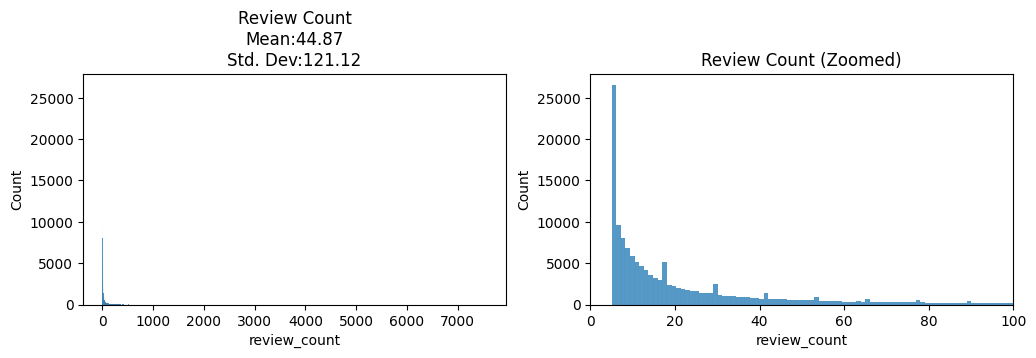

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(12,3))

sns.histplot(data = restaurants.review_count, ax = ax[0])
sns.histplot(data = restaurants.review_count, ax = ax[1])
ax[1].set_xlim([0,100])
ax[0].set_title(f'Review Count\nMean:{round(restaurants.review_count.mean(),2)}\nStd. Dev:{round(restaurants.review_count.std(),2)}')
ax[1].set_title(f'Review Count (Zoomed)')

In [189]:
restaurants.review_count.min()

5

### `is_open`

Text(0.5, 1.0, 'Is open\nMean:0.8\nStd. Dev:0.4')

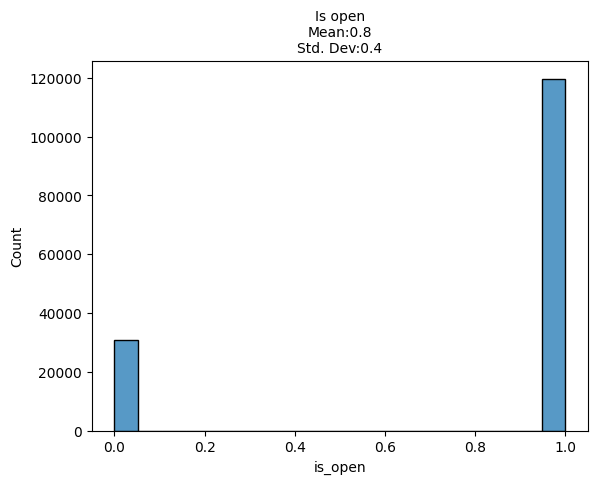

In [151]:
sns.histplot(data = restaurants.is_open);
plt.title(f'Is open\nMean:{round(restaurants.is_open.mean(),2)}\nStd. Dev:{round(restaurants.is_open.std(),2)}',
          fontsize=10)

In [152]:
restaurants.is_open.value_counts(normalize=True)

1    0.79615
0    0.20385
Name: is_open, dtype: float64

### `hours_per_week`

In [1129]:
restaurants.groupby('open_on_weekend')['stars'].mean()

open_on_weekend
False    2.814510
True     3.555792
Name: stars, dtype: float64

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

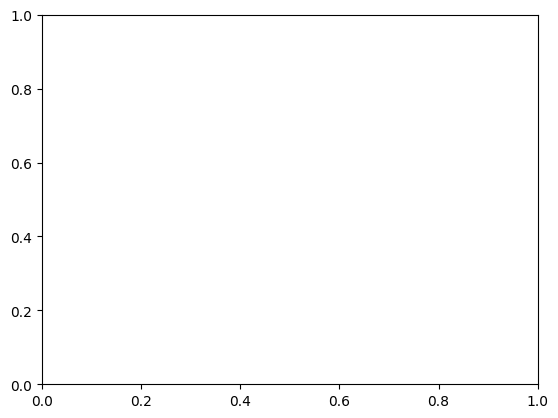

In [1127]:
sns.histplot(data=restaurants['hours_per_week'],
             color='open_on_weekend');

In [1125]:
restaurants[['stars', 'hours_per_week']].corr()

,stars,hours_per_week
stars,1.000000,-0.330539
hours_per_week,-0.330539,1.000000


<AxesSubplot:xlabel='hours_per_week', ylabel='stars'>

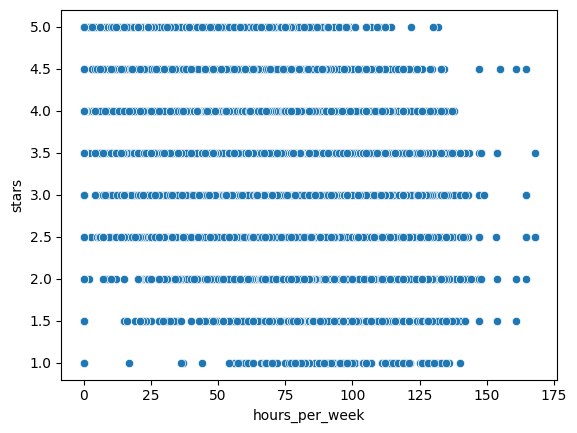

In [1124]:
sns.scatterplot(data=restaurants,
                x='hours_per_week',
                y='stars');

## Categorical features: `city`, `state`
### `city`

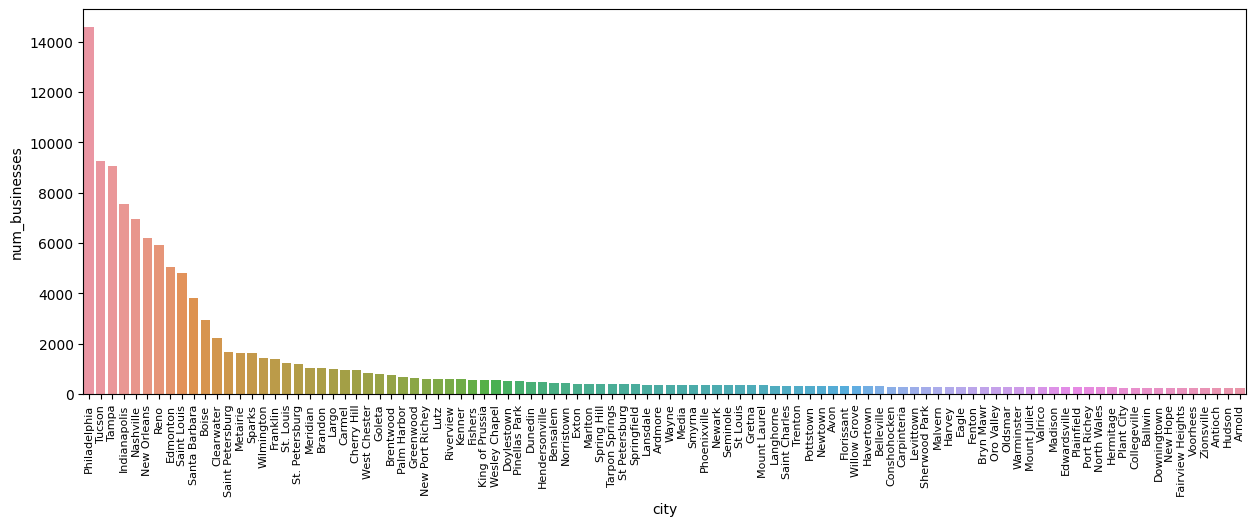

In [153]:
plt.figure(figsize=(15,5))

# Plot cities by number of businesses
city_counts = restaurants['city'].value_counts().reset_index()[:100]
city_counts.columns = ['city', 'num_businesses']

sns.barplot(data = city_counts,
            x='city',
            y='num_businesses')
# Rotate x-tick labels due to many cities
plt.xticks(rotation=90, fontsize=8);

In [154]:
restaurants.city.value_counts(normalize=True)[:5].sum()

0.3151397443230948

In [155]:
restaurants.city.nunique()

1416

In [156]:
restaurants.city.isnull().sum()

0

In [ ]:
sns.scatterplot(data=restaurants,
                )

### __Observations__
- There are __1416__ unique cities represented in the business dataset.
- Philadelphia accounts for 9,6% of all businesses.
- The top 5 cities (0,3% of all cities in dataset) account for 32% of businesses in the dataset.
- __No missing values.__

### `state`

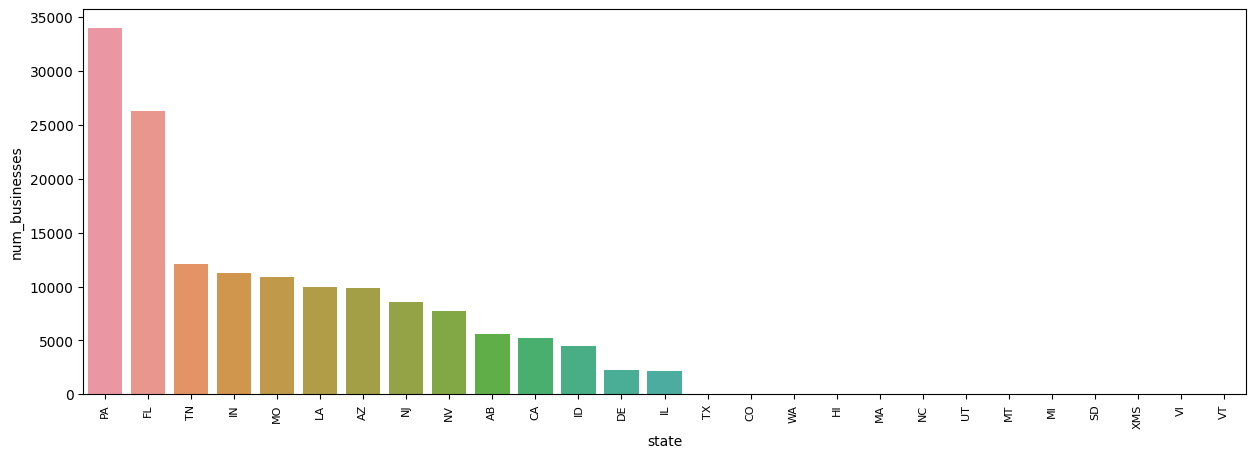

In [157]:
plt.figure(figsize=(15,5))

# Plot cities by number of businesses
state_counts = restaurants['state'].value_counts().reset_index()
state_counts.columns = ['state', 'num_businesses']

sns.barplot(data = state_counts,
            x='state',
            y='num_businesses')
# Rotate x-tick labels due to many states
plt.xticks(rotation=90, fontsize=8);

In [158]:
restaurants.state.nunique()

27

In [159]:
restaurants.state.isnull().sum()

0

In [160]:
restaurants.state.value_counts(normalize=True)[0:5]

PA    0.226404
FL    0.175129
TN    0.080188
IN    0.074807
MO    0.072586
Name: state, dtype: float64

### __Observations__
- 27 unique states represented
- High concentration:
  - Pennsylvania accounts for 23% of businesses
  - The top 5 states account for 63% of businesses
    - Pennsylvania (23%)
    - Florida (18%)
    - Tennessee (8%)
    - Indiana (7%)
    - Montana (7%)
- __No missing values__.

## Pre-Processing

In [1429]:
restaurants.address

0                  935 Race St
1                615 S Main St
2            8025 Mackenzie Rd
3          2312 Dickerson Pike
4                             
                 ...          
52263          19 N Bishop Ave
52264      1181 N Milwaukee St
52265            1108 S 9th St
52266          4405 Pennell Rd
52267    2470 Guardian Road NW
Name: address, Length: 52268, dtype: object